In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm
tqdm.pandas()

In [9]:
# Set pandas to show all columns on functions like df.head()

pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [10]:
! pip install matplotlib
!pip install wordcloud

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
DIRETORIO_COHEBERT = "data"

DIRETORIO_LOCAL = "/content/" + DIRETORIO_COHEBERT + "/"

# Diretório no google drive com os arquivos pré-processados
DIRETORIO_DRIVE = "/content/drive/MyDrive/Colab Notebooks/BERT_large_experimentos/" + DIRETORIO_COHEBERT

NOME_ARQUIVO_INPUT = 'bert_large_redacoes_tema_texto_motivador_categoria.csv'

In [13]:
df=pd.read_csv(f"{DIRETORIO_DRIVE}/{NOME_ARQUIVO_INPUT}")
df.sample(5)

,id,redacao,nota_competencia_2,nota_geral,tema,texto_motivador,categoria,sentencas_redacao,sentencas_texto_motivador,qtd_sentencas_redacao,qtd_sentencas_texto_motivador,redacao_bert_tokens,texto_motivador_bert_tokens,len_redacao,len_texto_motivador,qtd_bert_tokens_redacao,qtd_bert_texto_motivador,tokens_sentencas_redacao,tokens_sentencas_texto_motivador,tokens_sentencas_tema,avg_len_sentencas_redacao,avg_len_sentencas_texto_motivador,avg_bert_tokens_sentencas_texto_motivador,avg_bert_tokens_sentencas_redacao
2667,2671,Cogita-se com muita frequência da ausência da ...,160,680,Educação sexual na escola,A educação sexual é o nome dado ao processo qu...,educação,['Cogita-se com muita frequência da ausência d...,['A educação sexual é o nome dado ao processo ...,4,18,"['[CLS]', 'cog', '##ita', '-', 'se', 'com', 'm...","['[CLS]', 'a', 'educa', '##ca', '##o', 'sexual...",1806,2507,419,614,"[['[CLS]', 'cog', '##ita', '-', 'se', 'com', '...","[['[CLS]', 'a', 'educa', '##ca', '##o', 'sexua...","['[CLS]', 'educa', '##ca', '##o', 'sexual', 'n...",451.50,139.28,36.00,106.25
636,637,As vacinas foram criadas por meio de estudo a ...,80,400,A importância das vacinas para a sociedade,Vacinas são substâncias que possuem como funçã...,saúde,['As vacinas foram criadas por meio de estudo ...,['Vacinas são substâncias que possuem como fun...,8,16,"['[CLS]', 'as', 'vac', '##inas', 'foram', 'cri...","['[CLS]', 'vac', '##inas', 'sa', '##o', 'subst...",897,2498,225,668,"[['[CLS]', 'as', 'vac', '##inas', 'foram', 'cr...","[['[CLS]', 'vac', '##inas', 'sa', '##o', 'subs...","['[CLS]', 'a', 'importa', '##ncia', 'das', 'va...",112.12,156.12,43.62,29.88
1738,1740,A educação e a formação universitária é são o ...,120,600,Universidade em crise: quem paga a conta?,Após as manifestações contra o contingenciamen...,educação,['A educação e a formação universitária é são ...,['Após as manifestações contra o contingenciam...,9,42,"['[CLS]', 'a', 'educa', '##ca', '##o', 'e', 'a...","['[CLS]', 'apos', 'as', 'manifesta', '##co', '...",2008,4909,464,1089,"[['[CLS]', 'a', 'educa', '##ca', '##o', 'e', '...","[['[CLS]', 'apos', 'as', 'manifesta', '##co', ...","['[CLS]', 'universidade', 'em', 'crise', ':', ...",223.11,116.88,27.88,53.33
2203,2206,Não é surpresa nenhuma que o sistema prisional...,120,600,Caminhos para melhorar o sistema carcerário br...,"O relator especial da ONU Juan E. Méndez, espe...",segurança,['Não é surpresa nenhuma que o sistema prision...,"['O relator especial da ONU Juan E. Méndez, es...",11,14,"['[CLS]', 'na', '##o', 'e', 'surpresa', 'nenhu...","['[CLS]', 'o', 'relato', '##r', 'especial', 'd...",1468,1885,354,476,"[['[CLS]', 'na', '##o', 'e', 'surpresa', 'nenh...","[['[CLS]', 'o', 'relato', '##r', 'especial', '...","['[CLS]', 'caminhos', 'para', 'melhorar', 'o',...",133.45,134.64,35.86,34.00
2504,2508,A informação representa um fator fundamental p...,160,680,Informação e sociedade: o combate às fake news...,as fake news são mais do que simplesmente notí...,sociedade e cultura,['A informação representa um fator fundamental...,['as fake news são mais do que simplesmente no...,11,9,"['[CLS]', 'a', 'informa', '##ca', '##o', 'repr...","['[CLS]', 'as', 'fa', '##ke', 'ne', '##ws', 's...",1645,955,392,226,"[['[CLS]', 'a', 'informa', '##ca', '##o', 'rep...","[['[CLS]', 'as', 'fa', '##ke', 'ne', '##ws', '...","['[CLS]', 'informa', '##ca', '##o', 'e', 'soci...",149.55,106.11,26.89,37.45


# Filtra redacoes e textos motivadores com menos de 500 tokens

In [14]:
df=df[(df.qtd_bert_texto_motivador <= 500) & (df.qtd_bert_tokens_redacao <= 500)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 38 to 6453
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2106 non-null   int64  
 1   redacao                                    2106 non-null   object 
 2   nota_competencia_2                         2106 non-null   int64  
 3   nota_geral                                 2106 non-null   int64  
 4   tema                                       2106 non-null   object 
 5   texto_motivador                            2106 non-null   object 
 6   categoria                                  2106 non-null   object 
 7   sentencas_redacao                          2106 non-null   object 
 8   sentencas_texto_motivador                  2106 non-null   object 
 9   qtd_sentencas_redacao                      2106 non-null   int64  
 10  qtd_sentencas_texto_mot

# Estatística descritiva

## Informações gerais sobre o dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 38 to 6453
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2106 non-null   int64  
 1   redacao                                    2106 non-null   object 
 2   nota_competencia_2                         2106 non-null   int64  
 3   nota_geral                                 2106 non-null   int64  
 4   tema                                       2106 non-null   object 
 5   texto_motivador                            2106 non-null   object 
 6   categoria                                  2106 non-null   object 
 7   sentencas_redacao                          2106 non-null   object 
 8   sentencas_texto_motivador                  2106 non-null   object 
 9   qtd_sentencas_redacao                      2106 non-null   int64  
 10  qtd_sentencas_texto_mot

## Correlação entre a nota na competência 2 e a nota final

- Positiva

Quanto mais próximo de 1 o valor da correlação sugere que o quanto mais alta a nota na `competência 2` **mais alto** o valor da `nota final`.

- Negativa

Quanto mais próximo de `-1` a correlação sugere que quanto mais alto o valor ne `competência 2` **mais baixo** o valor da `nota final`


- Neutra

Quanto mais próximo de `0` o valor indica que não há correlação entre as variáveis.

In [16]:
df_s = df[['nota_competencia_2', 'nota_geral']]
corr = df_s.corr()
corr.style.background_gradient(cmap='coolwarm')

,nota_competencia_2,nota_geral
nota_competencia_2,1.000000,0.834085
nota_geral,0.834085,1.000000


<Axes: xlabel='nota_competencia_2', ylabel='nota_geral'>

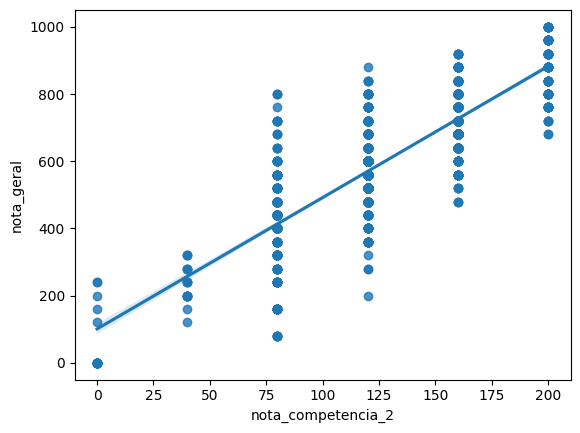

In [17]:
sns.regplot(x=df_s['nota_competencia_2'], y=df_s['nota_geral'])

# Distribuição de categorias de temas



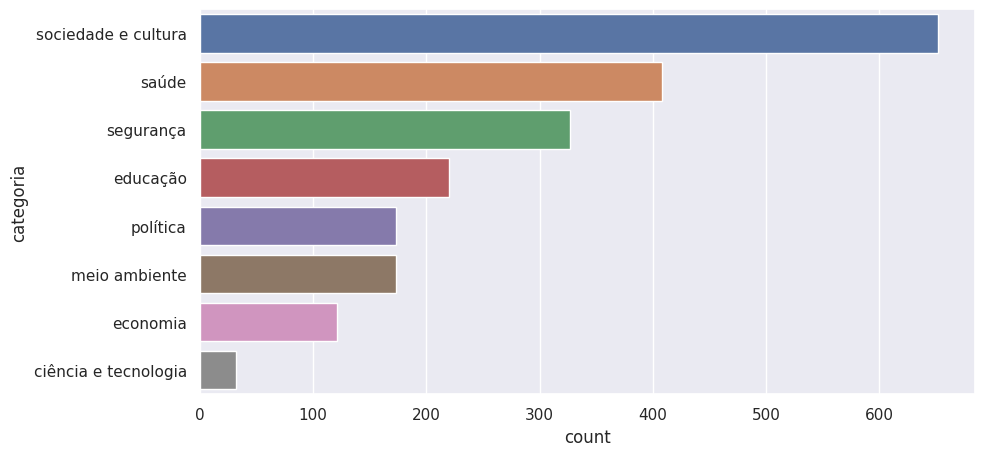

In [18]:
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10,5)

sns.countplot(y='categoria', data=df, order=df['categoria'].value_counts().index)
plt.show()

# ordernar por incidencia

# Estatísticas descritivas para nota na competência 2 e nota final

In [19]:
df['nota_competencia_2'].describe()

count   2106.00
mean     127.33
std       36.38
min        0.00
25%      120.00
50%      120.00
75%      160.00
max      200.00
Name: nota_competencia_2, dtype: float64

In [20]:
df['nota_geral'].describe()

count   2106.00
mean     598.33
std      170.41
min        0.00
25%      520.00
50%      600.00
75%      720.00
max     1000.00
Name: nota_geral, dtype: float64

# Análise comparativa entre nota na competência 2 e categorias de temas



In [21]:
df[['nota_competencia_2', 'categoria']].groupby('categoria').mean().sort_values(by='nota_competencia_2',ascending=False)

,nota_competencia_2
categoria,
segurança,132.48
saúde,132.25
meio ambiente,130.64
economia,125.62
educação,125.27
sociedade e cultura,123.31
política,123.24
ciência e tecnologia,118.75


In [22]:
print(df.categoria.value_counts().index.tolist())

['sociedade e cultura', 'saúde', 'segurança', 'educação', 'política', 'meio ambiente', 'economia', 'ciência e tecnologia']


<Axes: xlabel='nota_competencia_2', ylabel='categoria'>

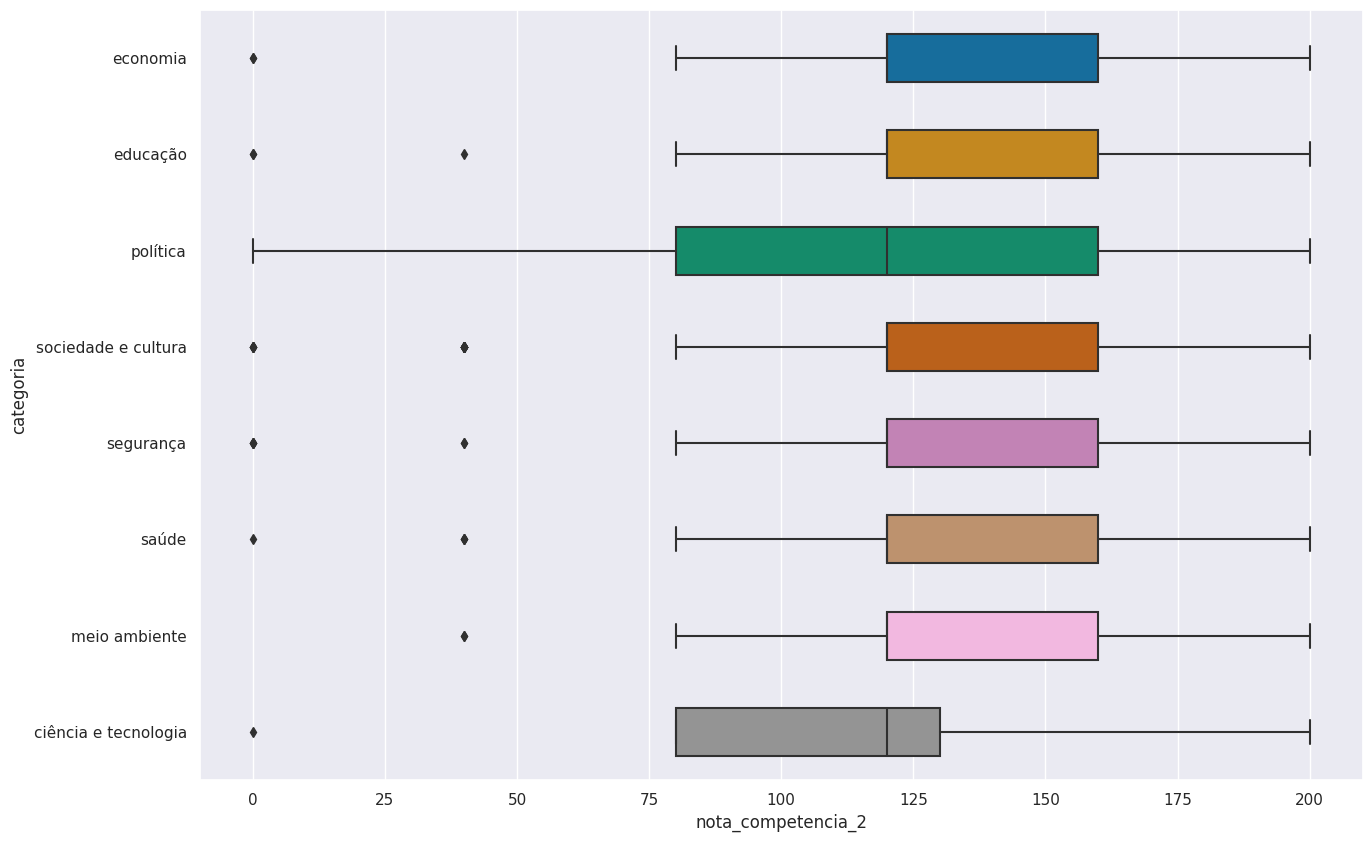

In [23]:
fig, ax = plt.subplots(figsize =(15, 10))

sns.set_style("whitegrid")
sns.boxplot(y='categoria', x='nota_competencia_2', data=df, width=0.5, palette='colorblind')

# rever, parece estranho

# Análise comparativa entre nota geral e categorias de temas

In [24]:
df[['nota_geral', 'categoria']].groupby('categoria').mean().sort_values(by='nota_geral',ascending=False)

,nota_geral
categoria,
segurança,645.50
saúde,640.00
política,614.10
meio ambiente,592.37
educação,591.64
economia,568.93
sociedade e cultura,556.07
ciência e tecnologia,550.00


<Axes: xlabel='nota_geral', ylabel='categoria'>

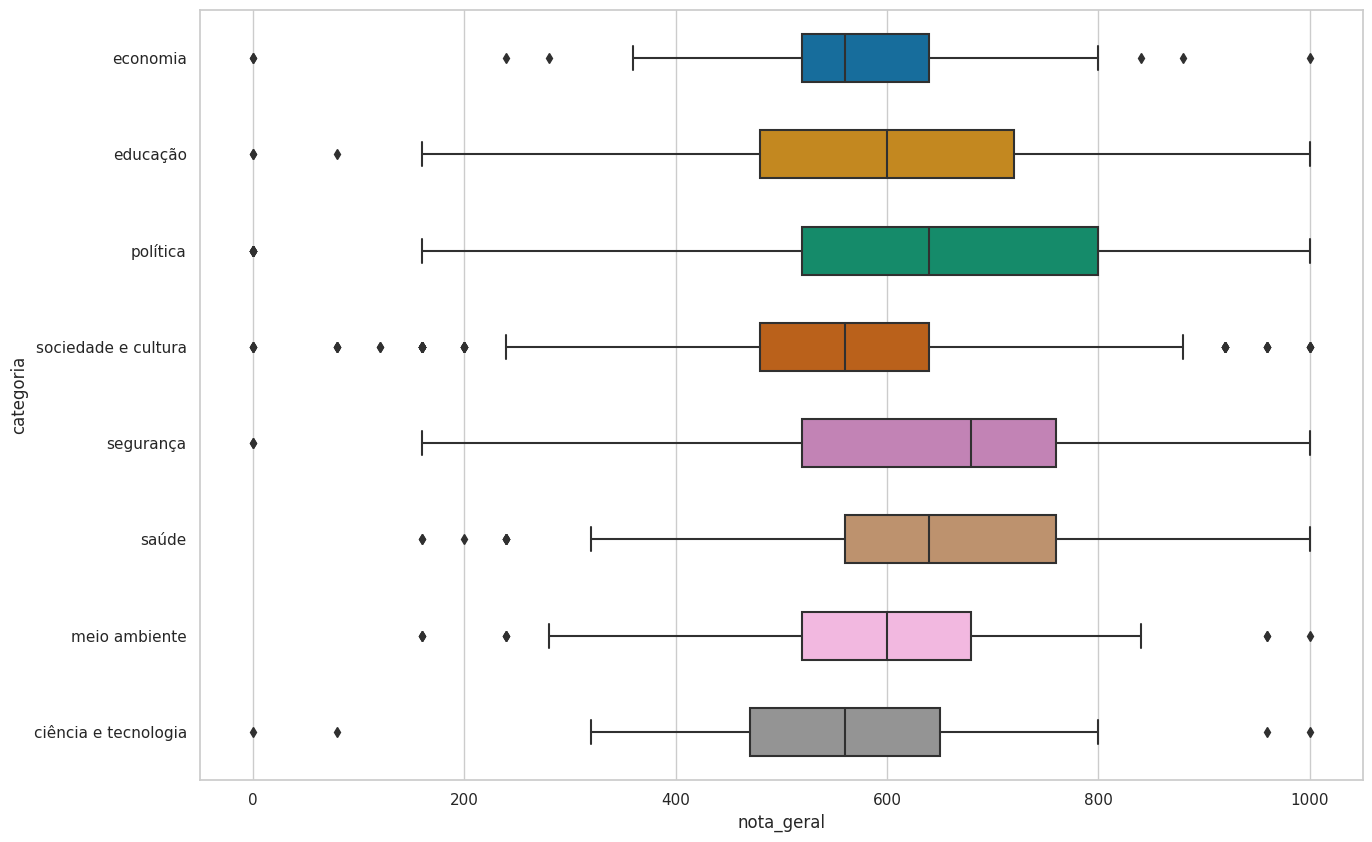

In [25]:
fig, ax = plt.subplots(figsize =(15, 10))

sns.set_style("whitegrid")
sns.boxplot(y='categoria', x='nota_geral', data=df, width=0.5, palette='colorblind')

# Histograma de notas na competência 2


([<matplotlib.axis.XTick at 0x7da3e5e76b60>,
 [Text(0, 0, '0'),
  Text(40, 0, '40'),
  Text(80, 0, '80'),
  Text(120, 0, '120'),
  Text(160, 0, '160'),
  Text(200, 0, '200')])

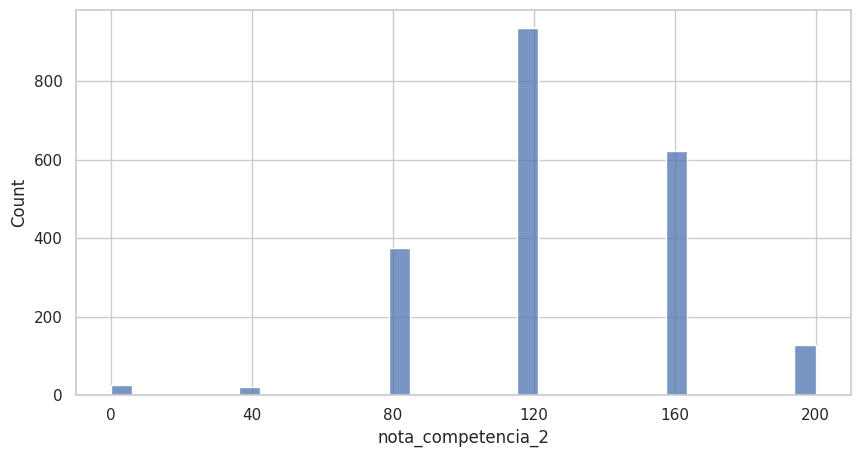

In [26]:
sns.histplot(data=df, x='nota_competencia_2')
plt.xticks([0, 40, 80, 120, 160, 200])

# Histograma de notas finais


<Axes: xlabel='nota_geral', ylabel='Count'>

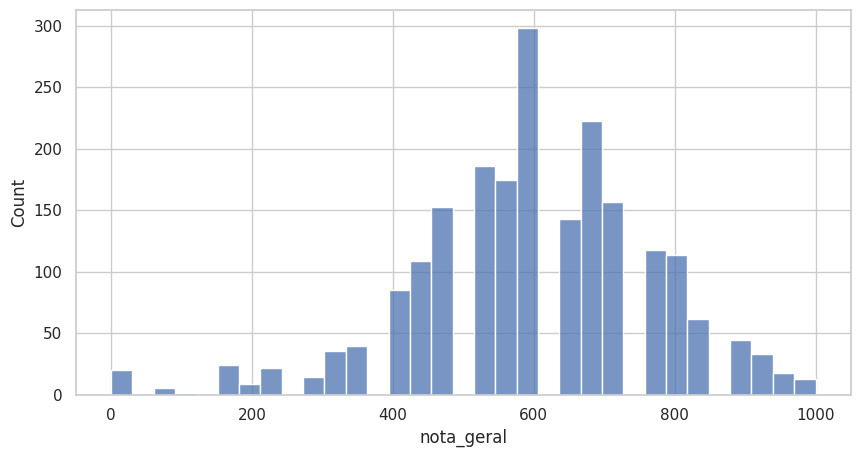

In [27]:
sns.histplot(data=df, x='nota_geral', legend=True)

# Análise de temas

Porte de armas pela população civil                                                                112
Reforma do Ensino Médio - uma solução ou um problema para a questão da educação no país?            81
Coronavírus: a importância da ciência para a sociedade                                              80
Impactos do uso das redes sociais na saúde mental                                                   74
Projeto de lei de iniciativa popular                                                                74
Fome: um retrato da desigualdade social no Brasil                                                   73
Caminhos para superar os desafios encontrados pelos negros atualmente                               73
Desafios na Educação a Distância no Brasil                                                          71
Como combater o aumento das DSTs entre os jovens brasileiros?                                       65
O discurso de ódio nas redes sociais                                     

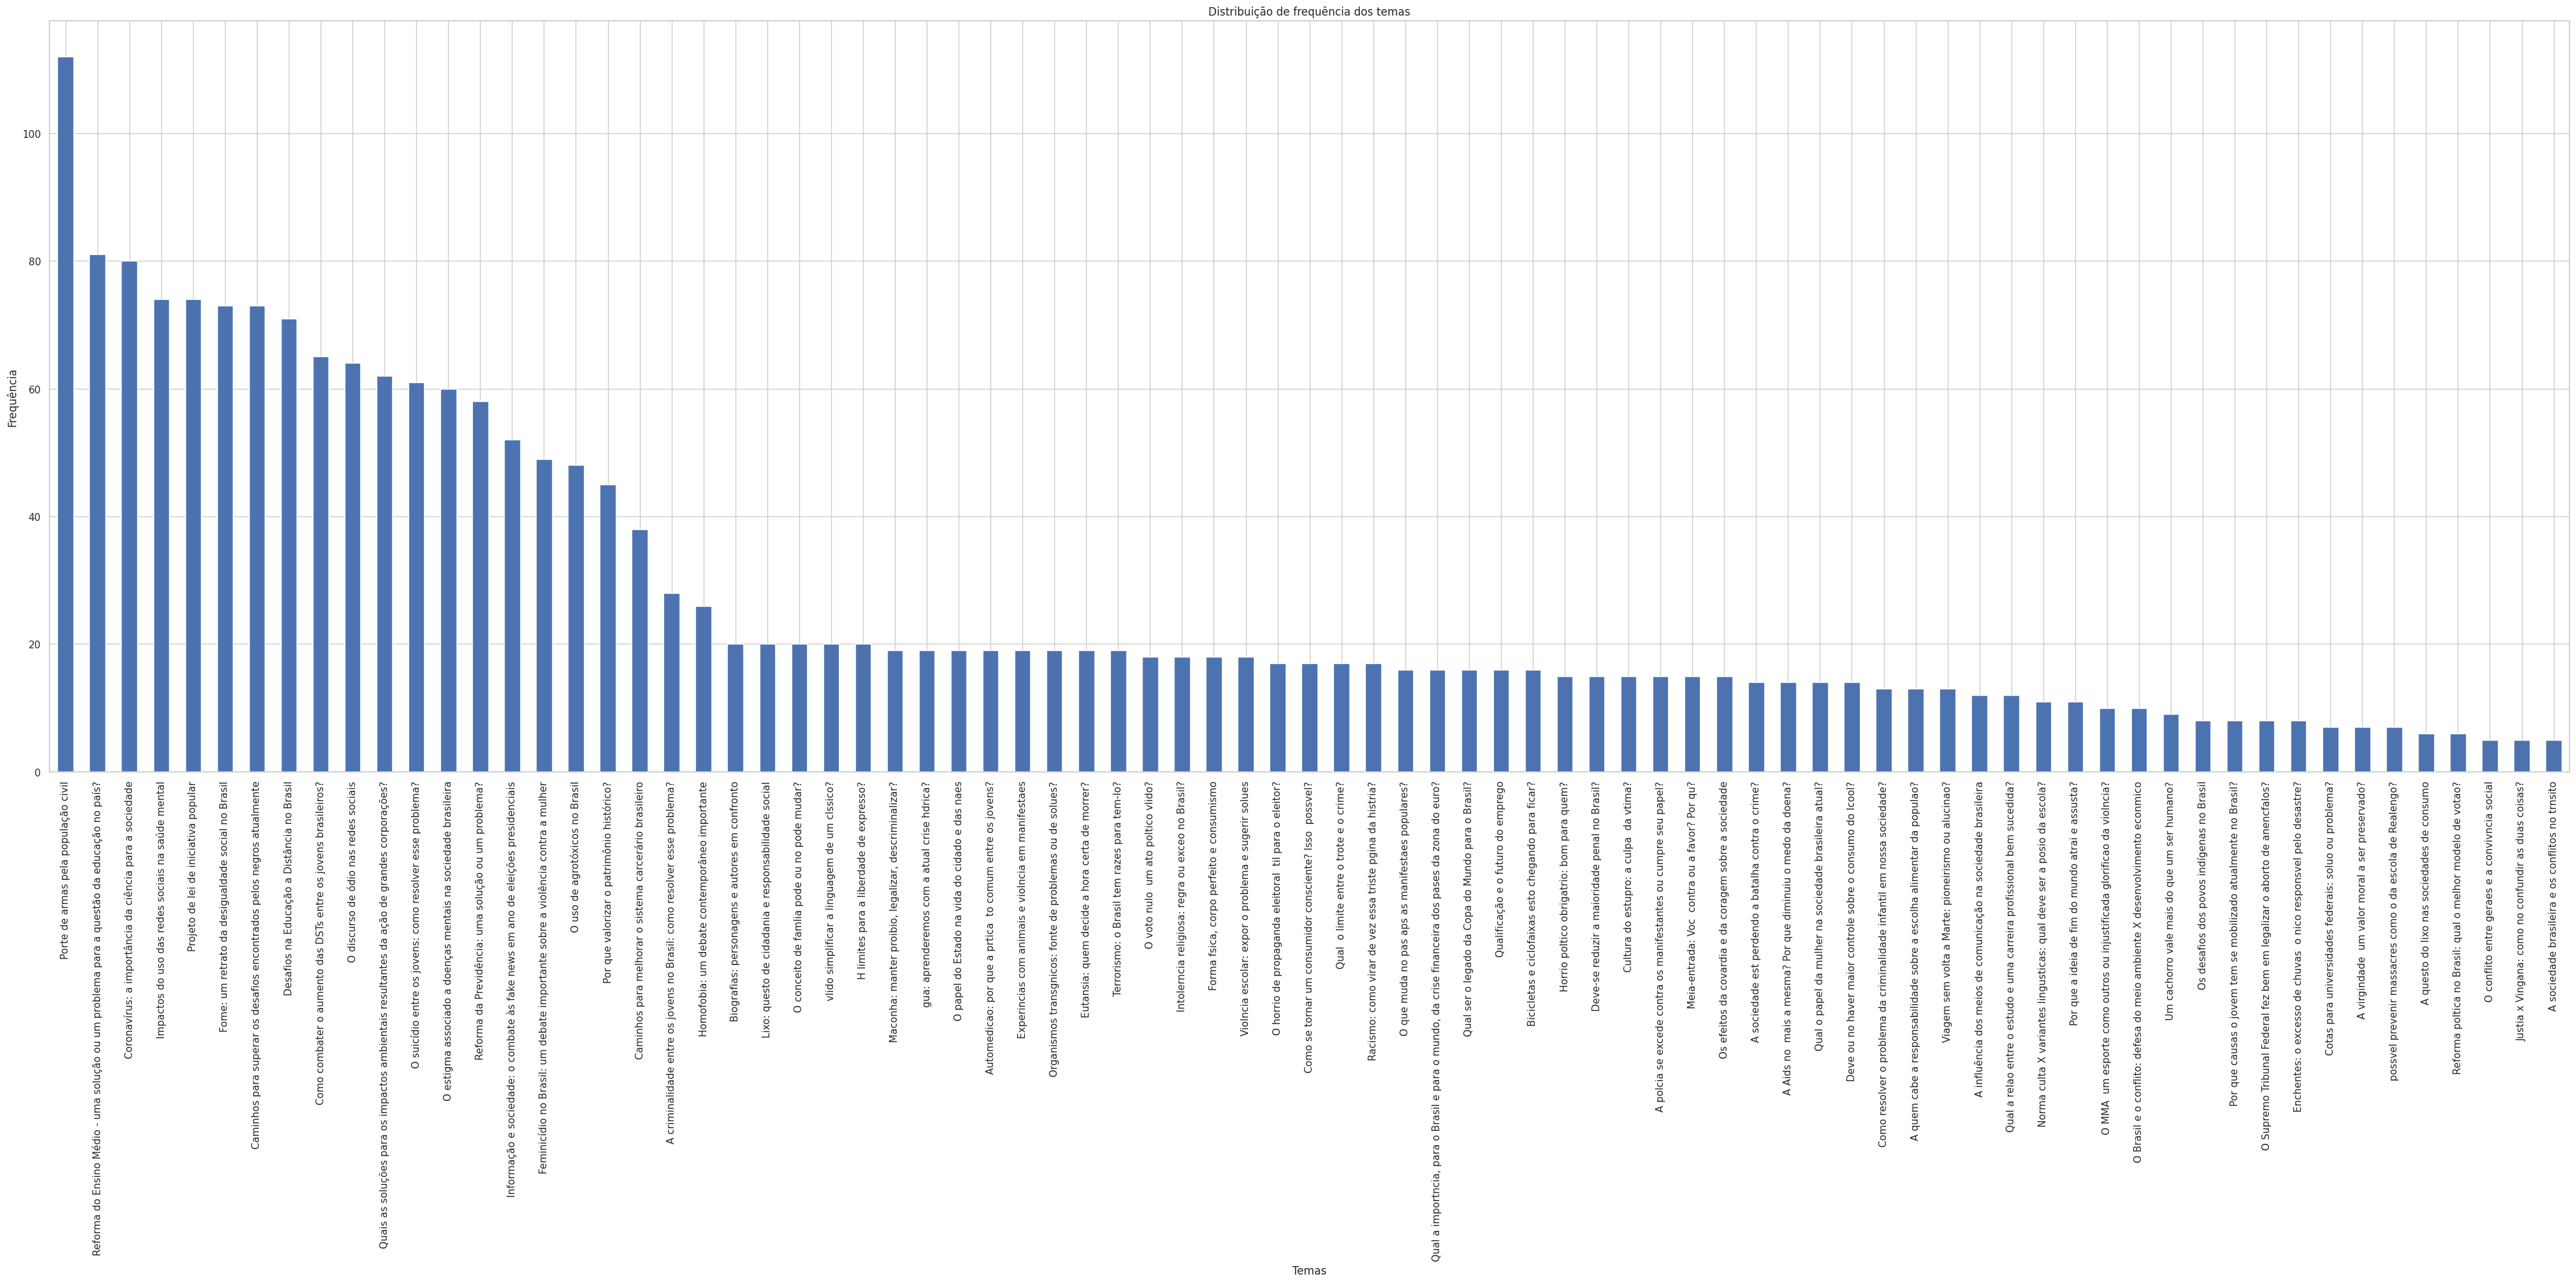

In [28]:
theme_counts = df['tema'].value_counts()
print(theme_counts)

theme_counts.plot(kind='bar', figsize=(50, 15))

plt.title('Distribuição de frequência dos temas')
plt.xlabel('Temas')
plt.ylabel('Frequência')
plt.show()

# Distribuição de temas por categoria

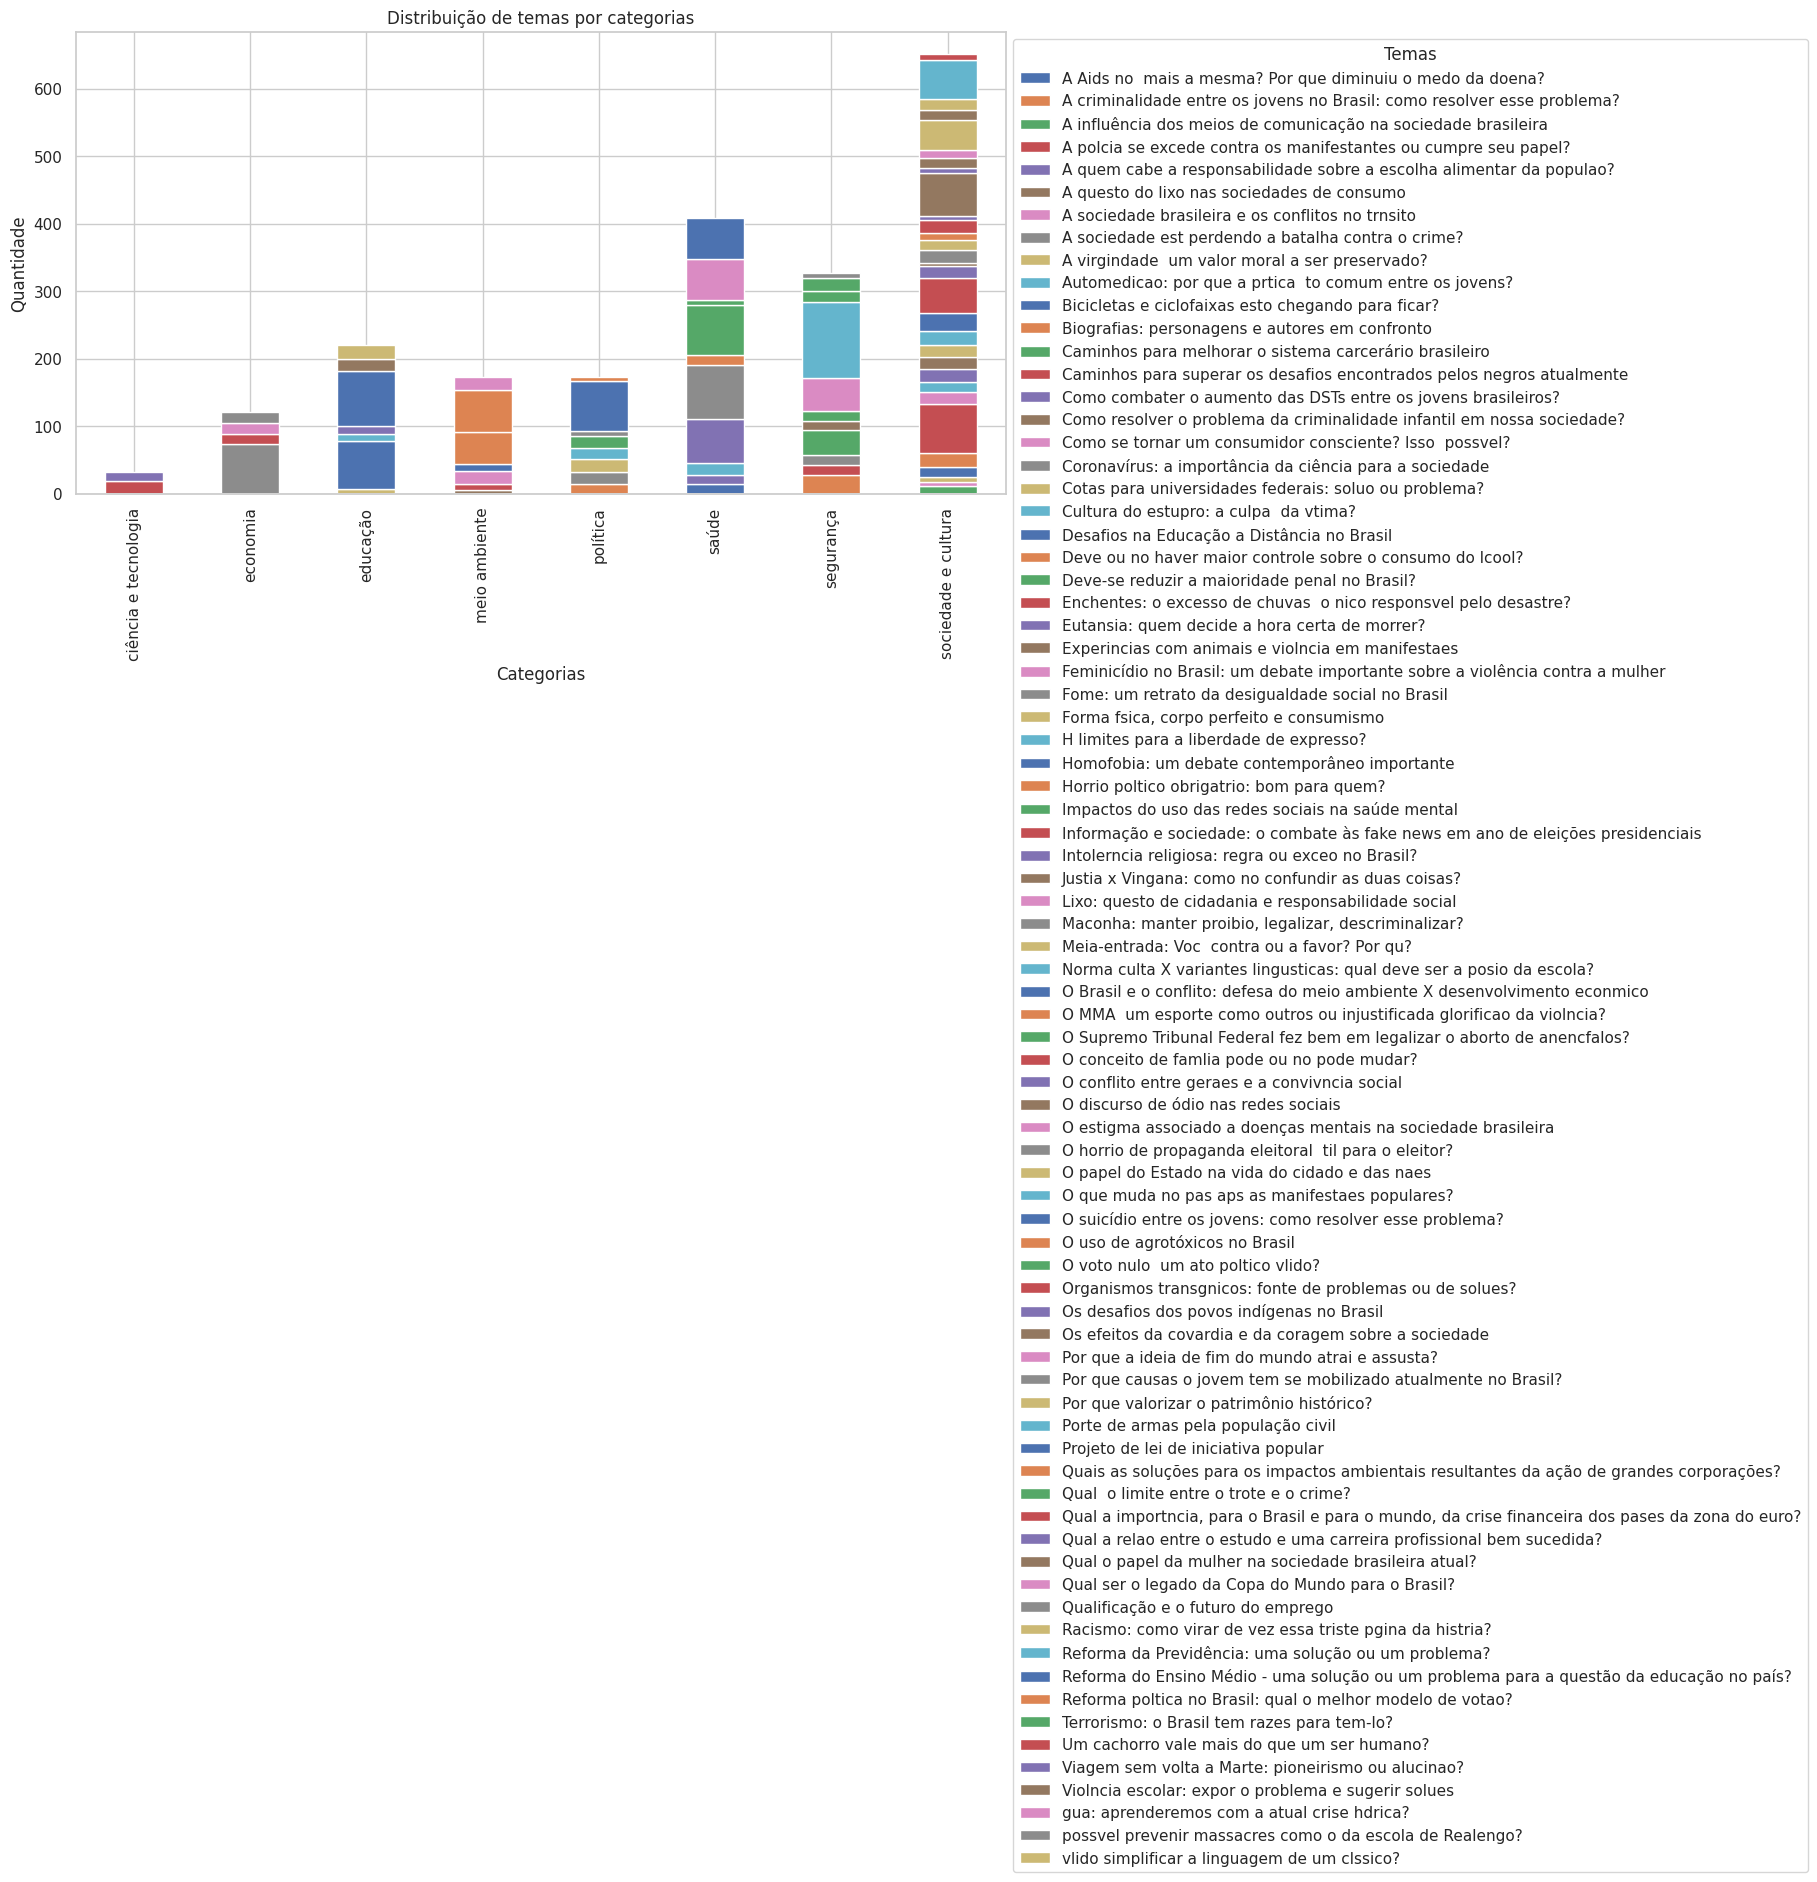

In [29]:
tema_categoria_counts = df.groupby(['categoria', 'tema']).size().reset_index(name='Count')
# print(tema_categoria_counts)

pivot_table = tema_categoria_counts.pivot(index='categoria', columns='tema', values='Count')

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribuição de temas por categorias')
plt.xlabel('Categorias')
plt.ylabel('Quantidade')
plt.legend(title='Temas', bbox_to_anchor=(1,1))
plt.show()

# Distribuição da quantidade de sentenças por redação

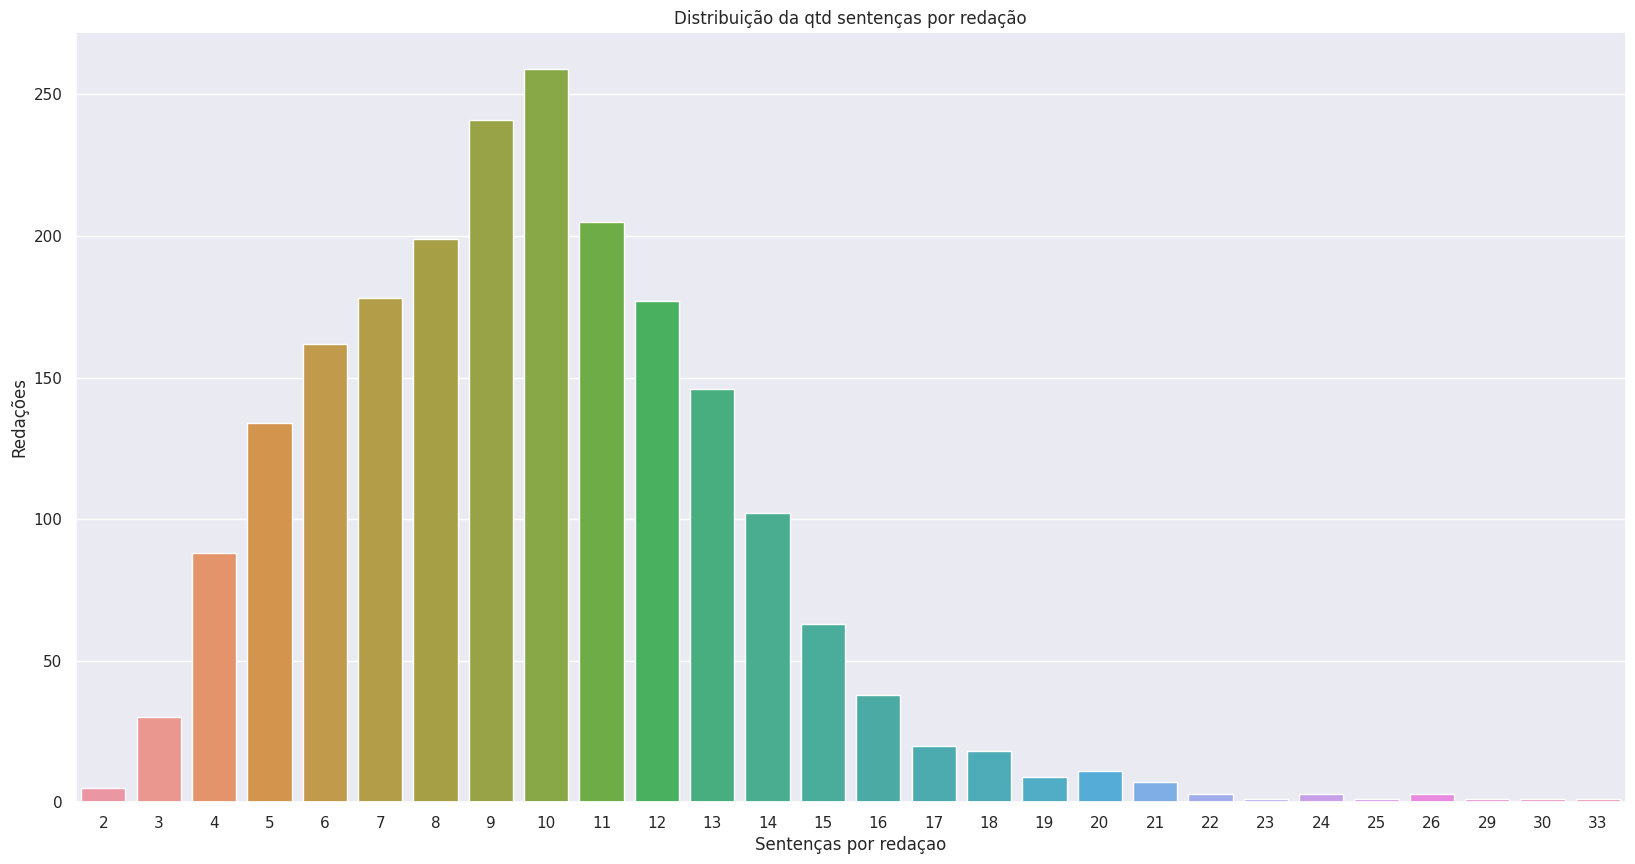

In [30]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (20,10)

ax = sns.countplot(x=df['qtd_sentencas_redacao'])

# Adiciona os valores as colunas
# for p in ax.patches:
#     ax.annotate(f"{p.get_height()}", (p.get_x()+0.3, p.get_height()+0.2))

plt.title("Distribuição da qtd sentenças por redação")
plt.xlabel("Sentenças por redaçao")
plt.ylabel("Redações")
plt.show()

In [31]:
df[df.qtd_sentencas_redacao > 30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 2605 to 2605
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         1 non-null      int64  
 1   redacao                                    1 non-null      object 
 2   nota_competencia_2                         1 non-null      int64  
 3   nota_geral                                 1 non-null      int64  
 4   tema                                       1 non-null      object 
 5   texto_motivador                            1 non-null      object 
 6   categoria                                  1 non-null      object 
 7   sentencas_redacao                          1 non-null      object 
 8   sentencas_texto_motivador                  1 non-null      object 
 9   qtd_sentencas_redacao                      1 non-null      int64  
 10  qtd_sentencas_texto_moti

# Distribuição da quantidade de BERT tokens por redação

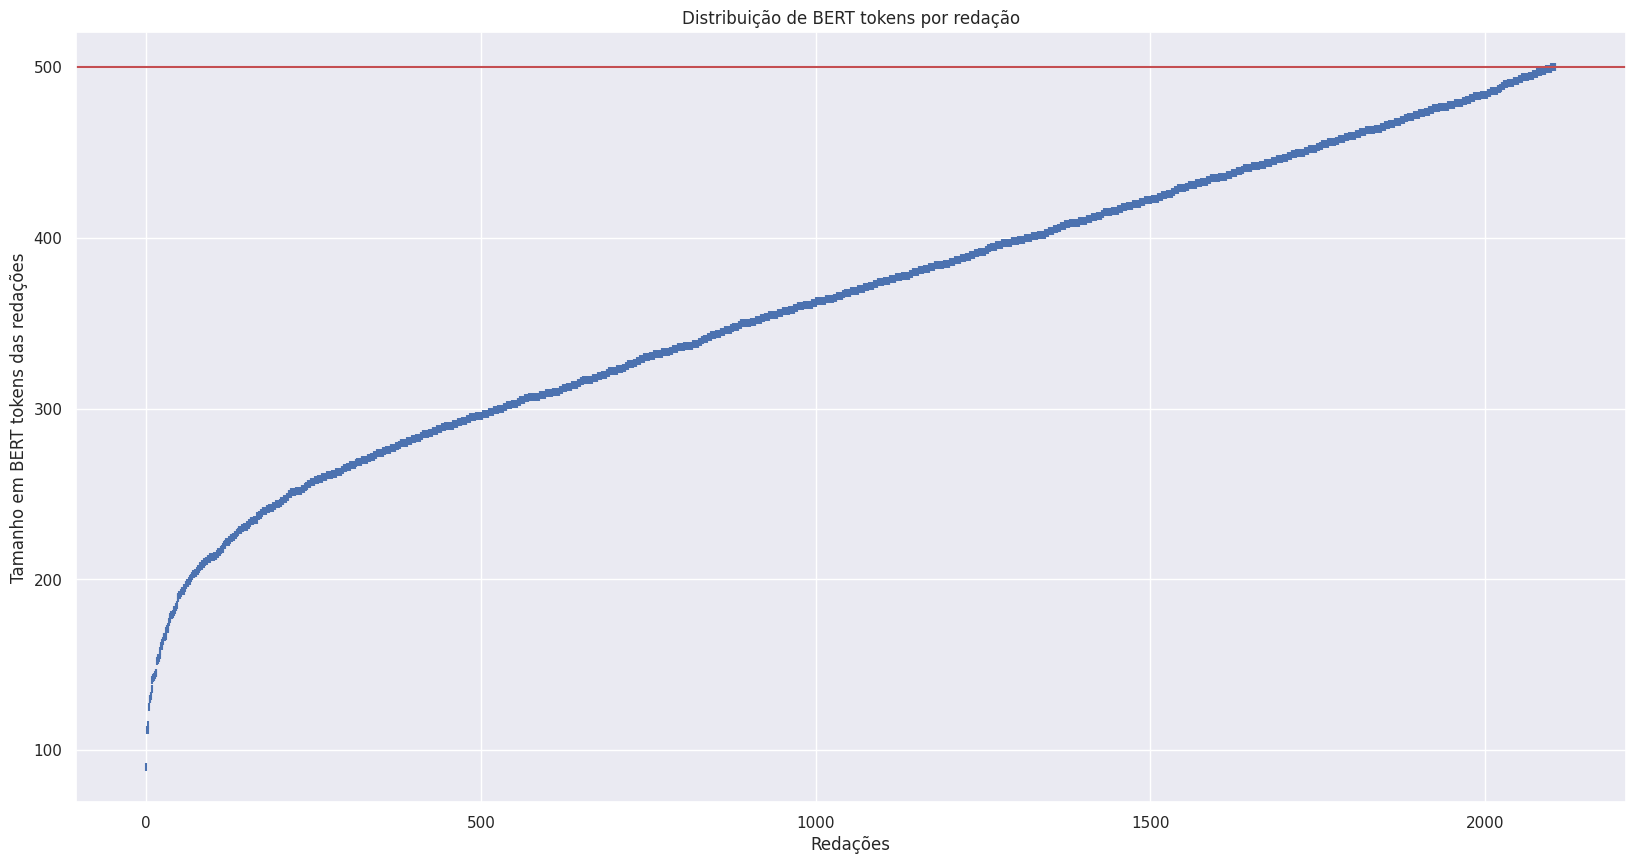

In [32]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(range(0, len(df['qtd_bert_tokens_redacao'])), sorted(df['qtd_bert_tokens_redacao']), marker="|")

plt.title("Distribuição de BERT tokens por redação")
plt.xlabel("Redações")
plt.ylabel("Tamanho em BERT tokens das redações")
plt.axhline(y=500, color='r', linestyle='-')
plt.show()

# ordear

# Distribuição do tamanho médio de sentenças tokenizadas em redações

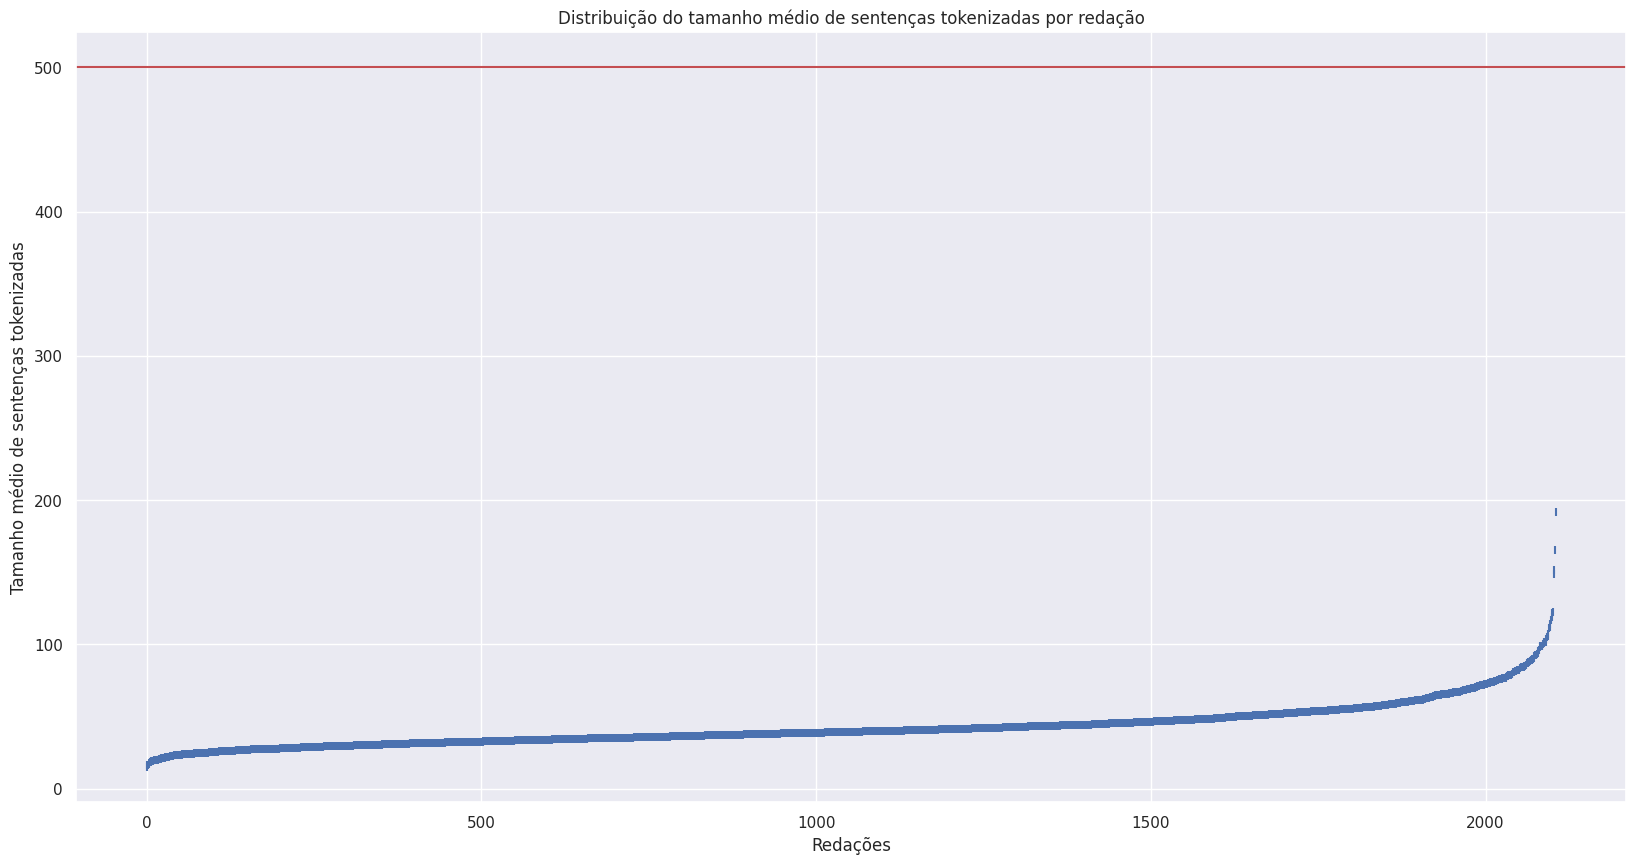

In [33]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(range(0, len(df['avg_bert_tokens_sentencas_redacao'])), sorted(df['avg_bert_tokens_sentencas_redacao']), marker="|")

plt.title("Distribuição do tamanho médio de sentenças tokenizadas por redação")
plt.xlabel("Redações")
plt.ylabel("Tamanho médio de sentenças tokenizadas")
plt.axhline(y=500, color='r', linestyle='-')
plt.show()

#

# Distribuição da quantidade de sentenças por texto motivador

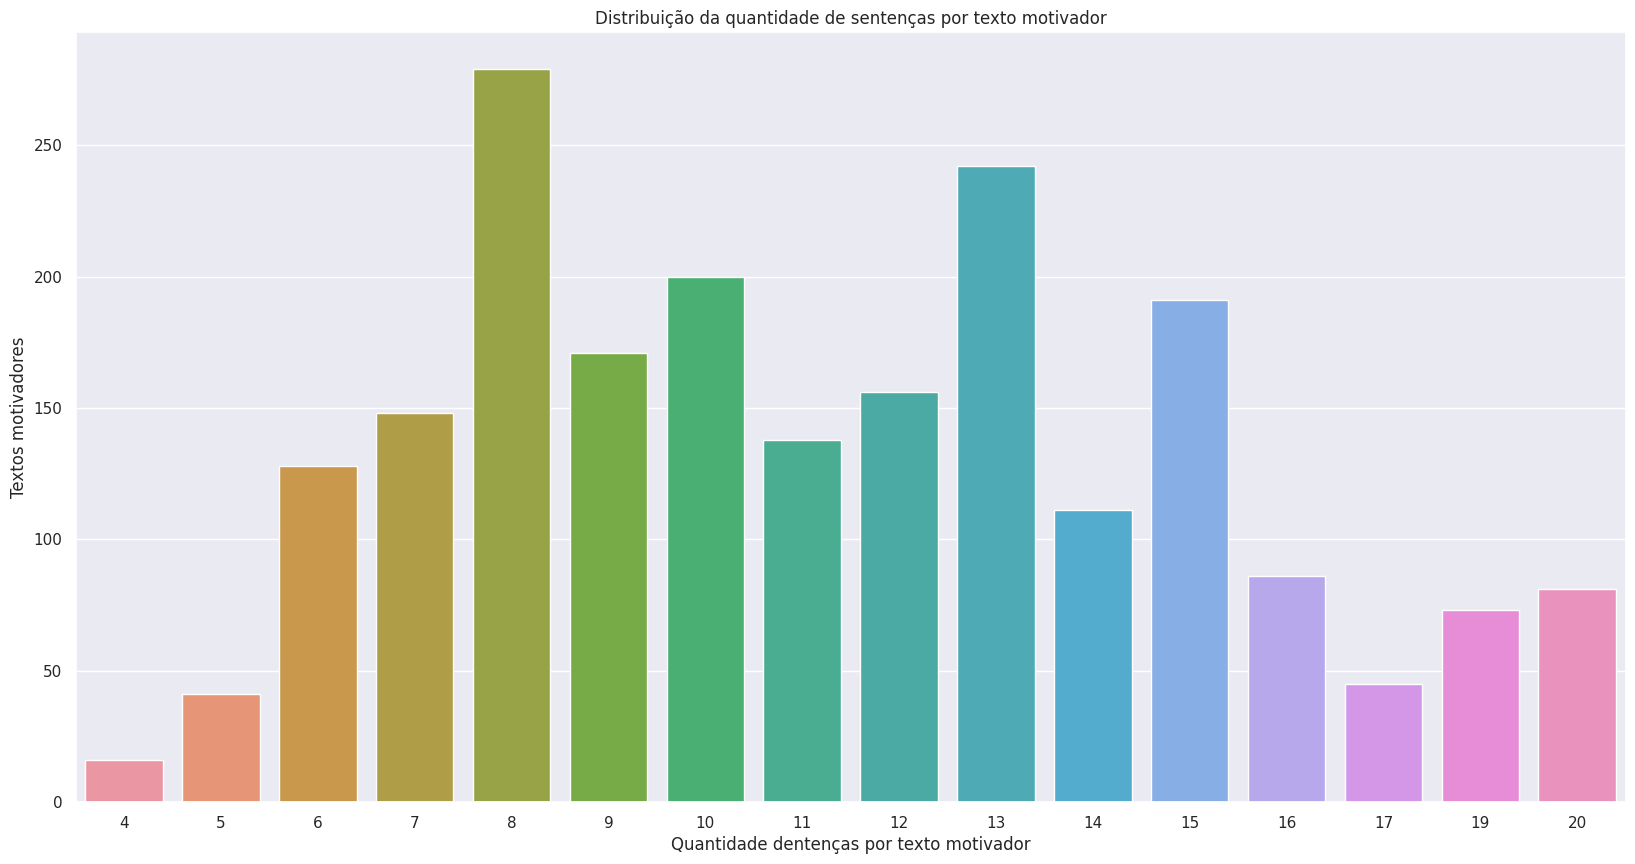

In [34]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (20,10)

ax = sns.countplot(x='qtd_sentencas_texto_motivador', data=df)

# Adiciona os valores as colunas
# for p in ax.patches:
#     ax.annotate(f"{p.get_height()}", (p.get_x()+0.3, p.get_height()+0.2))

plt.title("Distribuição da quantidade de sentenças por texto motivador")
plt.ylabel("Textos motivadores")
plt.xlabel("Quantidade dentenças por texto motivador")
plt.show()

In [35]:
df[df.qtd_sentencas_texto_motivador > 30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         0 non-null      int64  
 1   redacao                                    0 non-null      object 
 2   nota_competencia_2                         0 non-null      int64  
 3   nota_geral                                 0 non-null      int64  
 4   tema                                       0 non-null      object 
 5   texto_motivador                            0 non-null      object 
 6   categoria                                  0 non-null      object 
 7   sentencas_redacao                          0 non-null      object 
 8   sentencas_texto_motivador                  0 non-null      object 
 9   qtd_sentencas_redacao                      0 non-null      int64  
 10  qtd_sentencas_texto_motivador         

# Distribuição da quantidade de BERT tokens por texto motivador

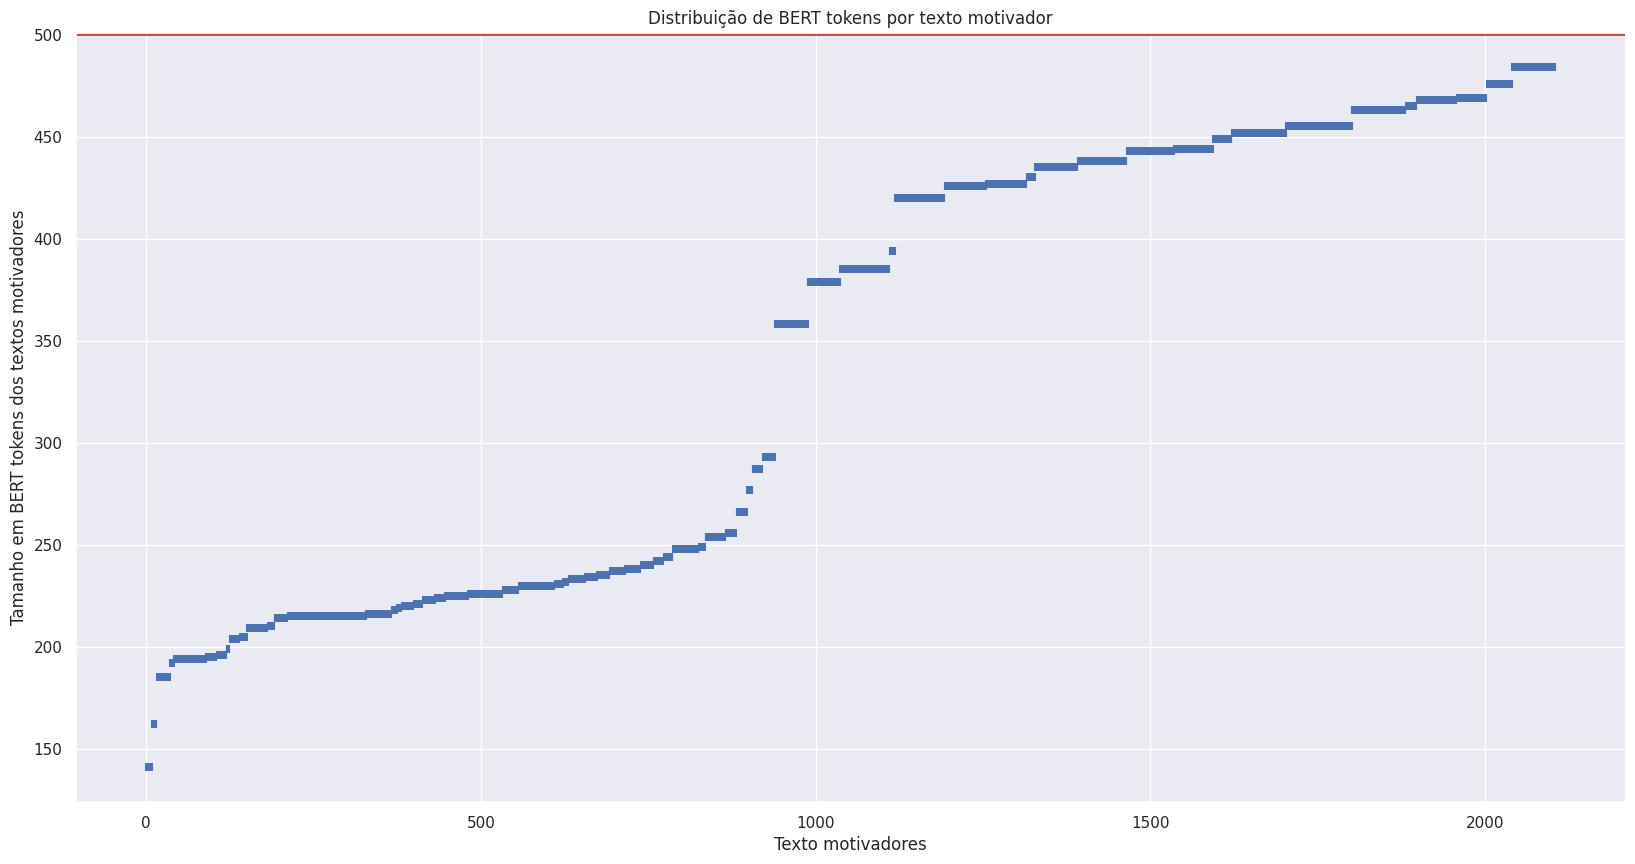

In [36]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(range(0, len(df['qtd_bert_texto_motivador'])), sorted(df['qtd_bert_texto_motivador']), marker="|")

plt.title("Distribuição de BERT tokens por texto motivador")
plt.xlabel("Texto motivadores")
plt.ylabel("Tamanho em BERT tokens dos textos motivadores")
plt.axhline(y=500, color='r', linestyle='-')
plt.show()

# Distribuição do tamanho médio de sentenças tokenizadas em textos motivadores

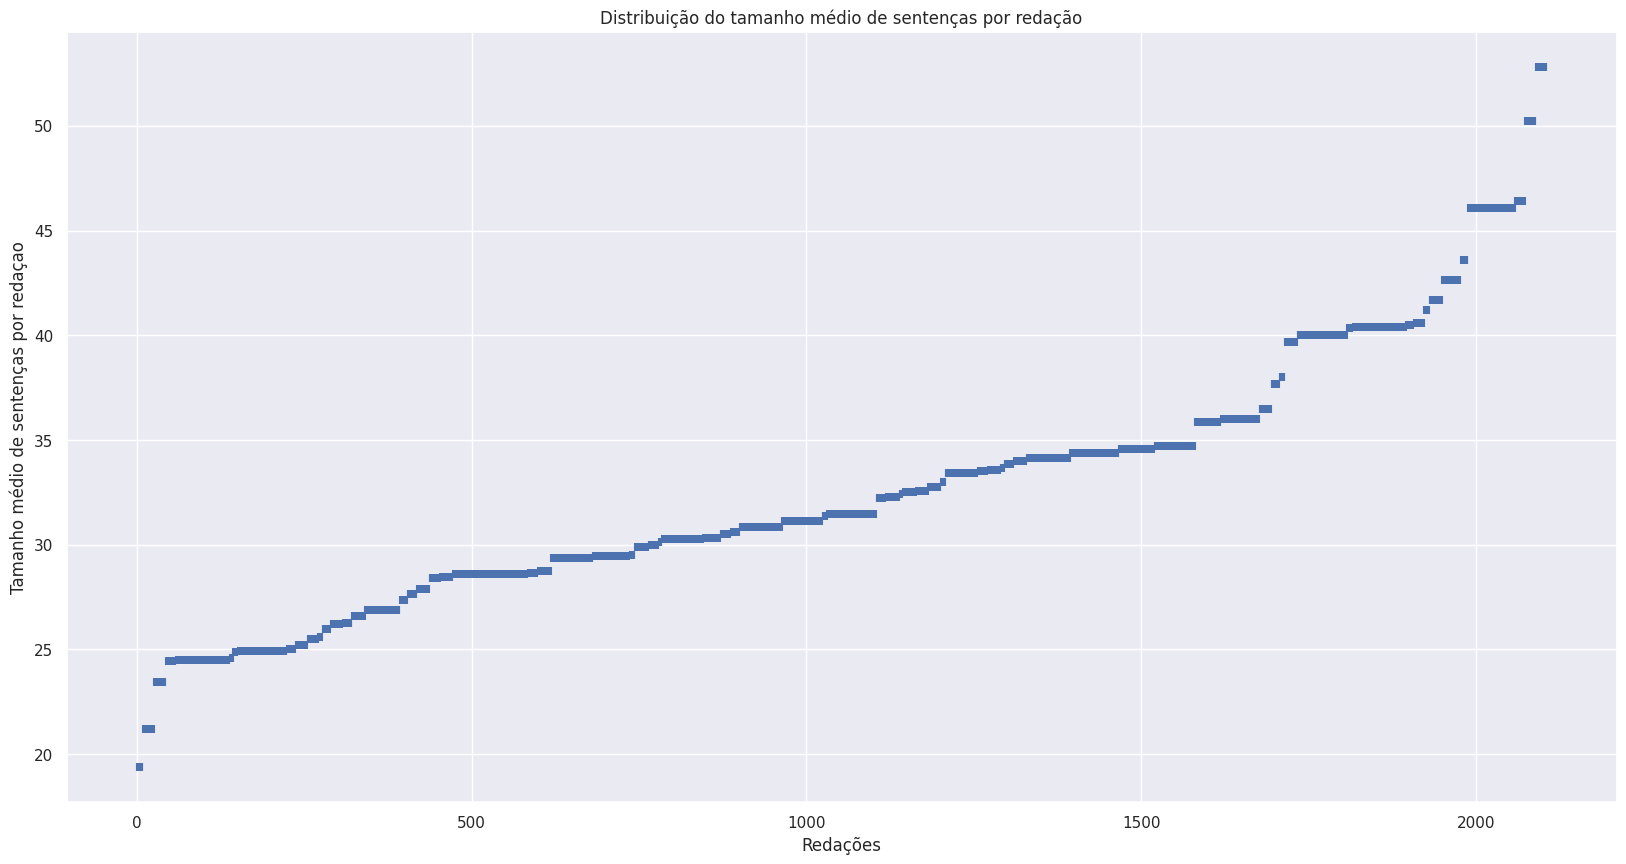

In [37]:
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(range(0, len(df['avg_len_sentencas_redacao'])), sorted(df['avg_bert_tokens_sentencas_texto_motivador']), marker="|")

# Adiciona os valores as colunas
# for p in ax.patches:
#     ax.annotate(f"{p.get_height()}", (p.get_x()+0.3, p.get_height()+0.2))

plt.title("Distribuição do tamanho médio de sentenças por redação")
plt.xlabel("Redações")
plt.ylabel("Tamanho médio de sentenças por redaçao")
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 38 to 6453
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2106 non-null   int64  
 1   redacao                                    2106 non-null   object 
 2   nota_competencia_2                         2106 non-null   int64  
 3   nota_geral                                 2106 non-null   int64  
 4   tema                                       2106 non-null   object 
 5   texto_motivador                            2106 non-null   object 
 6   categoria                                  2106 non-null   object 
 7   sentencas_redacao                          2106 non-null   object 
 8   sentencas_texto_motivador                  2106 non-null   object 
 9   qtd_sentencas_redacao                      2106 non-null   int64  
 10  qtd_sentencas_texto_mot

# Wordcloud por categoria filtrada

# Filtra registros por tema para gerar word cloud

Lista de valores possíveis para categoria:
- sociedade e cultura
- segurança
- saúde
- política
- meio ambiente
-educação
- economia
- ciência e tecnologia

In [40]:
from wordcloud import WordCloud, STOPWORDS

## Wordcloud do tema

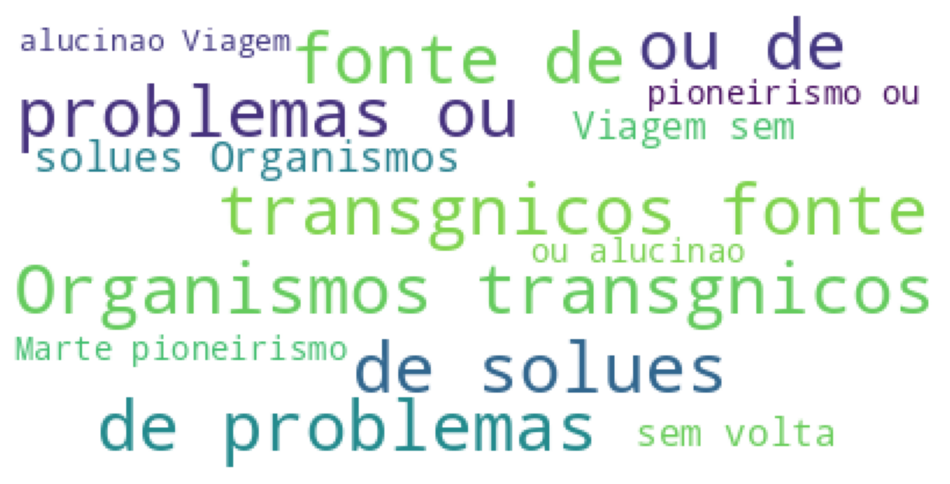

In [41]:
wordcloud_tema = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(''.join([str(x) for x in df_s['tema']]))

plt.rcParams["figure.figsize"] = (12,8)
plt.imshow(wordcloud_tema)
plt.axis("off")
plt.show()

## Wordcloud dos textos motivadores

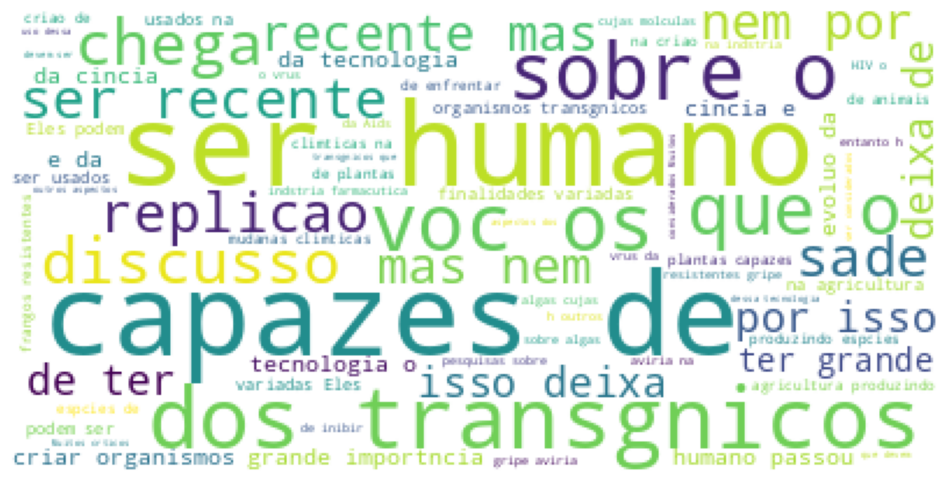

In [42]:
wordcloud_tema = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(''.join([str(x) for x in df_s['texto_motivador']]))

plt.rcParams["figure.figsize"] = (12,8)
plt.imshow(wordcloud_tema)
plt.axis("off")
plt.show()

## Wordcloud das redações

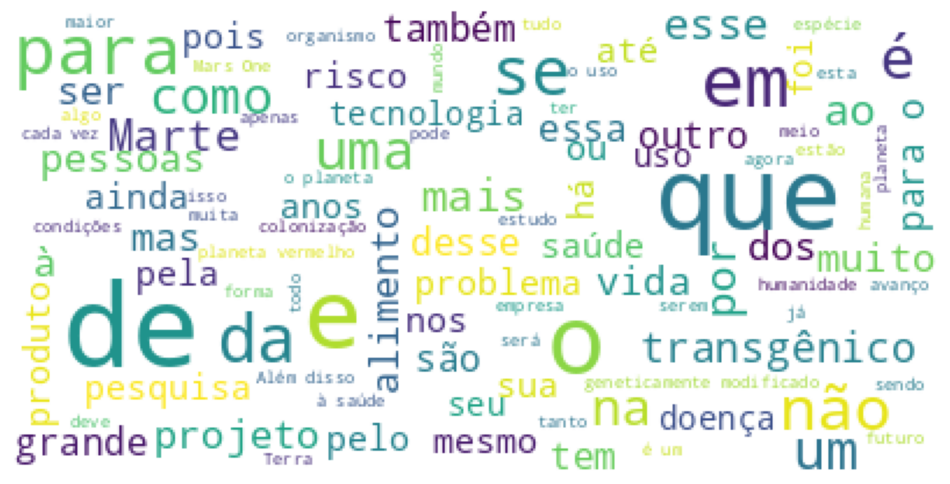

In [43]:
wordcloud_tema = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(''.join([str(x) for x in df_s['redacao']]))

plt.rcParams["figure.figsize"] = (12,8)
plt.imshow(wordcloud_tema)
plt.axis("off")
plt.show()